In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import seaborn as sns
from scipy.stats import mode
from tensorflow import keras
from keras.models import load_model
import matplotlib.pyplot as plt

### Image Data Preprocessing with `load_data` Function

This code defines a function, `load_data`, to preprocess and load image data from a specified folder path. The function reads images, converts them to RGB, resizes them to a consistent size, normalizes pixel values, and stores them as NumPy arrays. The function returns data and labels arrays. The example usage demonstrates loading data from a folder and printing the shapes of the resulting arrays.





In [3]:
from PIL import Image
import os
import numpy as np

def load_data(train_folder_path, target_size=(224, 224)):
    data = []
    labels = []

    classes = os.listdir(train_folder_path)
    
    for i, class_name in enumerate(classes):
        class_path = os.path.join(train_folder_path, class_name)
        images = os.listdir(class_path)

        for image in images:
            image_path = os.path.join(class_path, image)
            # Load the image data using PIL
            with Image.open(image_path) as img:
                # Convert the image to RGB
                img = img.convert('RGB')
                # Resize the image to a consistent size
                img = img.resize(target_size)
                # Convert the image to a NumPy array
                image_data = np.array(img)
                image_data = image_data/255
            
            # Append image data and label to lists
            data.append(image_data)
            labels.append(i)

    data = np.array(data)
    labels = np.array(labels)
    print(data.shape, labels.shape)
    return data, labels

# Example usage
train_folder_path = "C:\\Users\\Himanshu\\Desktop\\SML_CNN\\final_dataset"
data, labels = load_data(train_folder_path)


(5954, 224, 224, 3) (5954,)


In [4]:
print(data, labels)

[[[[0.96078431 0.95686275 0.94901961]
   [0.95294118 0.94901961 0.94117647]
   [0.95294118 0.94901961 0.94117647]
   ...
   [0.97647059 1.         1.        ]
   [0.97647059 1.         1.        ]
   [0.97647059 1.         1.        ]]

  [[0.96078431 0.95686275 0.94901961]
   [0.95686275 0.95294118 0.94509804]
   [0.95686275 0.95294118 0.94509804]
   ...
   [0.97647059 1.         1.        ]
   [0.97647059 1.         1.        ]
   [0.97647059 1.         1.        ]]

  [[0.96078431 0.95686275 0.94901961]
   [0.95686275 0.95294118 0.94509804]
   [0.96470588 0.96078431 0.95294118]
   ...
   [0.97647059 1.         1.        ]
   [0.97647059 1.         1.        ]
   [0.97647059 1.         1.        ]]

  ...

  [[0.83529412 0.86666667 0.78039216]
   [0.71372549 0.81960784 0.88627451]
   [0.63137255 0.82745098 0.99607843]
   ...
   [0.95686275 0.94509804 0.58039216]
   [0.96078431 0.94509804 0.63137255]
   [0.96470588 0.94901961 0.68235294]]

  [[0.75686275 0.81568627 0.78039216]
   [0.6

### Loading and Splitting Image Data

This code snippet loads image data from a specified folder path, prints the shapes of the data and labels, and performs a train-test split using `train_test_split` from scikit-learn. The resulting shapes of the training and testing datasets are then printed in bold.
.

In [6]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5954, 224, 224, 3) (5954,)
(4167, 224, 224, 3) (1787, 224, 224, 3) (4167,) (1787,)


In [7]:
y_train

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
y_test

### Building a 2-Layer CNN with Keras

This code uses Keras to construct a 2-layer Convolutional Neural Network (CNN) for binary classification. It includes convolutional layers with max pooling, dropout for regularization, and fully connected layers. The model is compiled with binary crossentropy loss and the Adam optimizer.


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Building a 2-layer Convolutional Neural Network
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten Layer
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

### Model Compilation and Training

The code compiles the previously defined model with the following configurations:

- **Loss Function:** Binary Crossentropy
- **Optimizer:** Adam
- **Metrics:** Accuracy

It then trains the model for 10 epochs on the training data with a batch size of 32, using the validation data for validation during training. Finally, the trained model is saved as "my_model1.h5".


In [9]:
#Compilation of the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model1.h5")

Epoch 1/10


131/131 [==============================] - 97s 718ms/step - loss: 0.9782 - accuracy: 0.6163 - val_loss: 0.6358 - val_accuracy: 0.6754
Epoch 2/10
131/131 [==============================] - 90s 685ms/step - loss: 0.5642 - accuracy: 0.7223 - val_loss: 0.5714 - val_accuracy: 0.7325
Epoch 3/10
131/131 [==============================] - 90s 690ms/step - loss: 0.4619 - accuracy: 0.7847 - val_loss: 0.5073 - val_accuracy: 0.7750
Epoch 4/10
131/131 [==============================] - 94s 717ms/step - loss: 0.3576 - accuracy: 0.8435 - val_loss: 0.4432 - val_accuracy: 0.8058
Epoch 5/10
131/131 [==============================] - 89s 680ms/step - loss: 0.2384 - accuracy: 0.9083 - val_loss: 0.3633 - val_accuracy: 0.8528
Epoch 6/10
131/131 [==============================] - 91s 698ms/step - loss: 0.1501 - accuracy: 0.9486 - val_loss: 0.3209 - val_accuracy: 0.8870
Epoch 7/10
131/131 [==============================] - 89s 681ms/step - loss: 0.0974 - accuracy: 0.9657 - val_loss: 0.3267 - val_

C:\Users\Himanshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


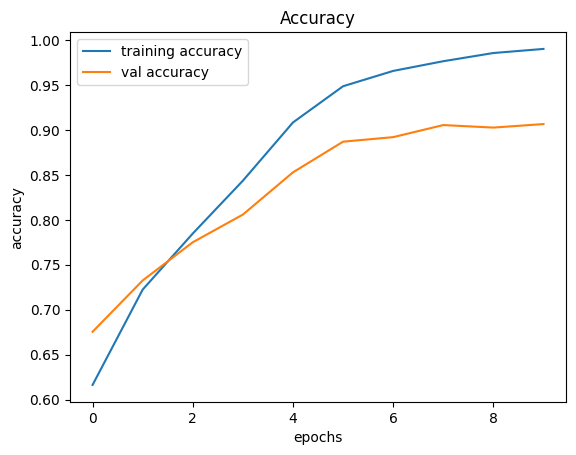

In [68]:
#plotting graphs for accuracy 
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Model Evaluation

The code predicts labels (`y_pred`) and probabilities (`y_pred_prob`) using the trained model on the test set. The following evaluations are performed:

1. **Accuracy Calculation:**
   - Accuracy is computed using the predicted and actual labels on the test set.

2. **Classification Report:**
   - Displays precision, recall, and F1-score for each class.

3. **Confusion Matrix:**
   - Generates a confusion matrix with annotated values, providing insights into true and predicted values.

4. **F1 Score:**
   - Computes the F1 score as an additional performance metric.



56/56 [==============================] - 5s 89ms/step
Model Accuracy on Test Set: 0.906547285954113

 Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       906
           1       0.91      0.90      0.90       881

    accuracy                           0.91      1787
   macro avg       0.91      0.91      0.91      1787
weighted avg       0.91      0.91      0.91      1787

Accuracy   Score :  0.906547285954113
F1 Score:  0.9042979942693411


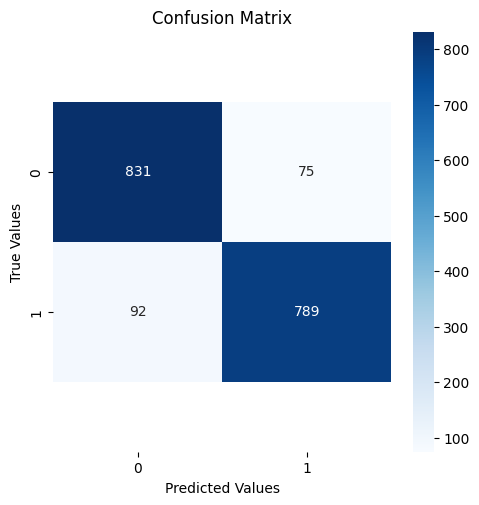

In [12]:

y_pred_prob = model.predict(X_test)

y_pred = (y_pred_prob > 0.5).astype(int)
 
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)

print(f'Model Accuracy on Test Set: {accuracy}')
 
print ("\n Classification report : \n",classification_report (y_test, y_pred))

print ("Accuracy   Score : ",accuracy_score (y_test, y_pred))
 
#Generate confusion-matrix as below

conf_matrix = confusion_matrix (y_test, y_pred)

plt.figure (figsize=(12,12))

plt.subplot (221)

sns.heatmap (conf_matrix, fmt = "d", annot=True, cmap='Blues')

b, t = plt.ylim()

plt.ylim (b + 0.5, t - 0.5)

plt.ylabel ('True Values')

plt.title ('Confusion Matrix')

plt.xlabel ('Predicted Values')
 
#Generate F1-score as below

f1 = f1_score (y_test, y_pred)

print ("F1 Score: ", f1)

In [13]:
model.save('my_model1.h5')

C:\Users\Himanshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Grad-CAM Visualization

The code defines a function, `get_grad_cam`, to generate Grad-CAM (Gradient-weighted Class Activation Mapping) for a given model, image tensor, and class index. It then demonstrates the application of Grad-CAM on a specific image from the dataset:

1. **Function to Generate Grad-CAM:**
   - Defines a function to compute Grad-CAM given a model, image tensor, and class index.

2. **Load Saved Model:**
   - Loads a pre-trained model from the file "my_model1.h5".

3. **Choose an Image:**
   - Selects an image from the training dataset (change the index accordingly).

4. **Get Grad-CAM:**
   - Applies the `get_grad_cam` function to obtain the Grad-CAM heatmap.

5. **Display Original Image:**
   - Visualizes the original image.

6. **Display Grad-CAM Heatmap:**
   - Displays the Grad-CAM heatmap generated for the chosen image.


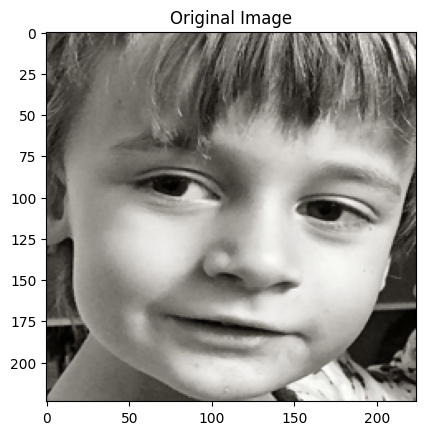

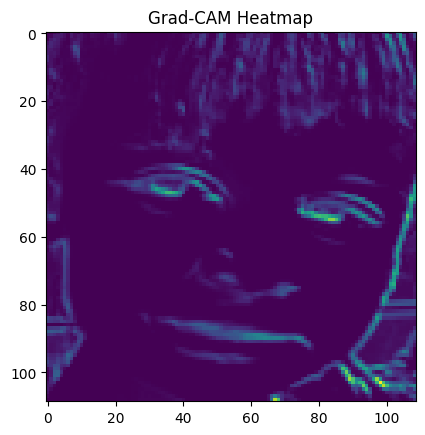

In [63]:
# Function to get Grad-CAM
def get_grad_cam(model, img_tensor, class_index):
    # Define the model for extracting feature maps and gradients
    last_conv_layer_name = 'conv2d_1'  # Change this to the correct name from your model
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    # Get the gradient of the predicted class with respect to the output feature map of the last convolutional layer
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_tensor)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    
    # Compute the guided gradients
    guided_grads = tf.cast(conv_outputs > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

    # Compute the average of the gradients along spatial dimensions
    weights = tf.reduce_mean(guided_grads, axis=(1, 2))

    # Compute the weighted sum of the feature maps
    cam = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1)
    
    # Apply ReLU to the CAM
    cam = tf.nn.relu(cam)

    # Normalize the heatmap
    cam = (cam - tf.reduce_min(cam)) / (tf.reduce_max(cam) - tf.reduce_min(cam))

    return cam.numpy()

# Load the saved model
model = load_model("my_model1.h5")

# Choose an image from your dataset
img_tensor = np.expand_dims(X_train[675], axis=0)

# Assuming binary classification; change this index accordingly
class_index = 0

# Get Grad-CAM
heatmap = get_grad_cam(model, img_tensor, class_index)

# Display the original image
plt.imshow(img_tensor[0])
plt.title("Original Image")
plt.show()

# Display the heatmap
plt.imshow(heatmap[0], cmap='viridis')
plt.title("Grad-CAM Heatmap")
plt.show()


In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

### SHAP (SHapley Additive exPlanations) Analysis

The code utilizes the SHAP library to perform Shapley values analysis for interpretability on a deep learning model:

1. **Load Model:**
   - Loads the pre-trained model from the file "my_model1.h5."

2. **Create SHAP DeepExplainer:**
   - Utilizes the SHAP DeepExplainer to create an explainer object using the loaded model and a subset of the training data (X_train[:13]) for explanation.

3. **Calculate SHAP Values:**
   - Computes SHAP values for a subset of test data (X_test[:3]).

4. **Visualize SHAP Values:**
   - Generates and displays SHAP value heatmaps for the chosen subset of test data.

This analysis aids in understanding the impact of different features on the model's predictions.


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


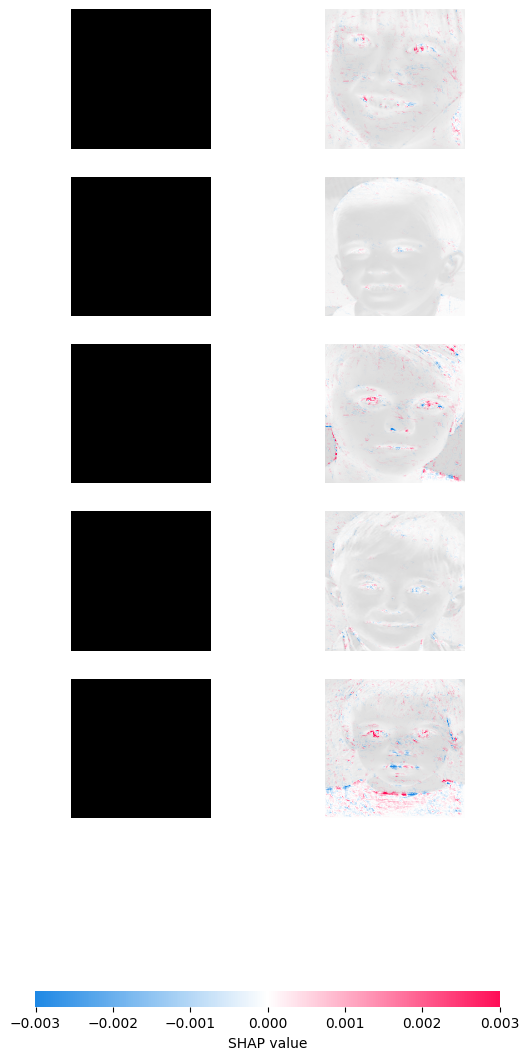

In [67]:
import shap
import numpy as np
from keras.models import load_model

# Load your specific model
loaded_model = load_model("my_model1.h5")



# Create a SHAP DeepExplainer using your model and a subset of training data
explainer = shap.DeepExplainer(loaded_model, X_train[:13])  # Using a subset of training data for explanation

# Calculate SHAP values for a subset of test data
shap_values = explainer.shap_values(X_test[:3])

# Visualize the SHAP values as heatmaps
shap.image_plot(shap_values, -X_test[:3])  # Plot SHAP value heatmaps


### Summary 

A Convolutional Neural Network (CNN) is implemented for image classification. The workflow encompasses loading and preprocessing image data, building a 2-layer CNN with Keras, training and evaluating the model, and enhancing interpretability through techniques like Grad-CAM and SHAP analysis. Grad-CAM visually highlights influential regions in images for decision-making, while SHAP analysis provides insights into feature contributions, collectively fostering both accuracy and transparency in the CNN's decision process. The project seeks not only to achieve effective image classification but also to provide a deeper understanding of the model's decision-making rationale.